## Задача 1
    Постройте график
    Назовите график
    Сделайте именование оси x и оси y
    Сделайте выводы

### 1.1. Скачать следующие данные: kc-house-data и laptop_price

In [1]:
import pandas as pd
df = pd.read_csv("laptop_price.csv", sep= ',',encoding='windows-1251')
df.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69


In [2]:
df1 = pd.read_csv("kc-house-data.csv", sep= ',',encoding='windows-1251')
df1.head(1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 1.2. Изучите стоимости недвижимости

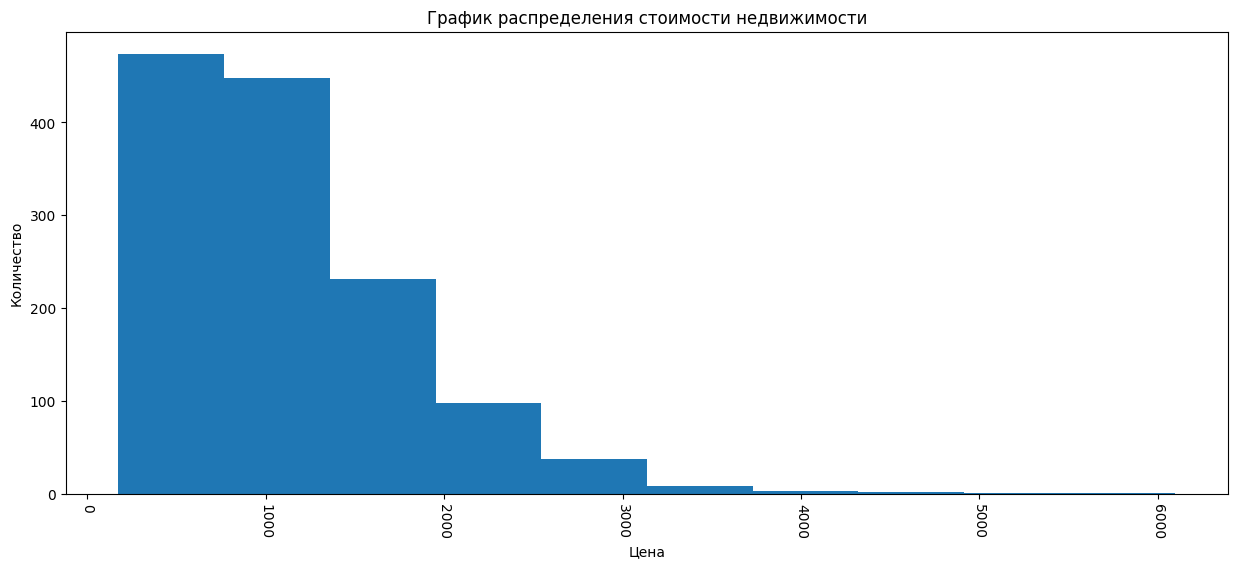

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.hist(df['Price_euros'])
plt.title("График распределения стоимости недвижимости")
plt.xlabel("Цена")
plt.ylabel("Количество")
plt.xticks(rotation=-90);

Больше всего квартир со стоиомсть от 300 до 1300 тыс. евро

### 1.3. Изучите распределение квадратуры жилой

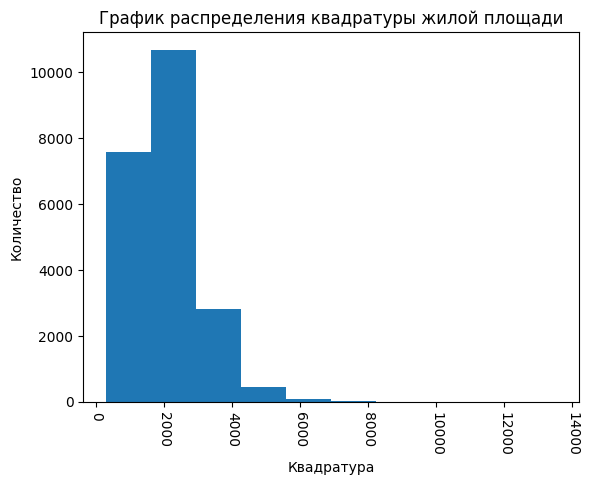

In [4]:
plt.hist(df1['sqft_living'])
plt.title("График распределения квадратуры жилой площади")
plt.xlabel("Квадратура")
plt.ylabel("Количество")
plt.xticks(rotation=-90);

Больше всего домов с квадратурой от 2000 до 3000

### 1.4. Изучите распределение года постройки

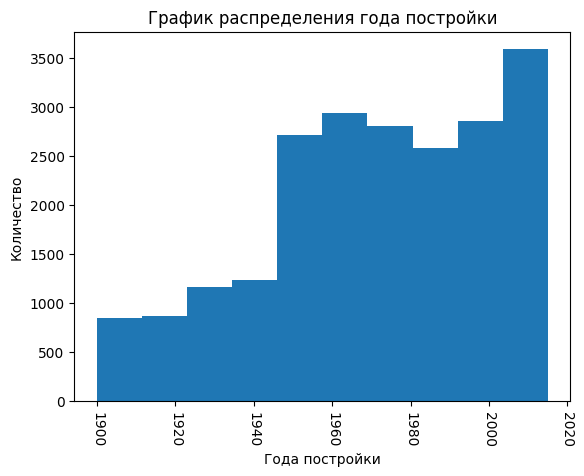

In [5]:
plt.hist(df1['yr_built'])
plt.title("График распределения года постройки")
plt.xlabel("Года постройки")
plt.ylabel("Количество")
plt.xticks(rotation=-90);

Больше всего новых домов с годами постройки от 2005 до 2015

## 2 задача

### 2.1. Изучите распределение домов от наличия вида на набережную
    Постройте график
    Сделайте выводы

In [6]:
df1_1=df1['waterfront'].value_counts()
df1_1

waterfront
0    21450
1      163
Name: count, dtype: int64

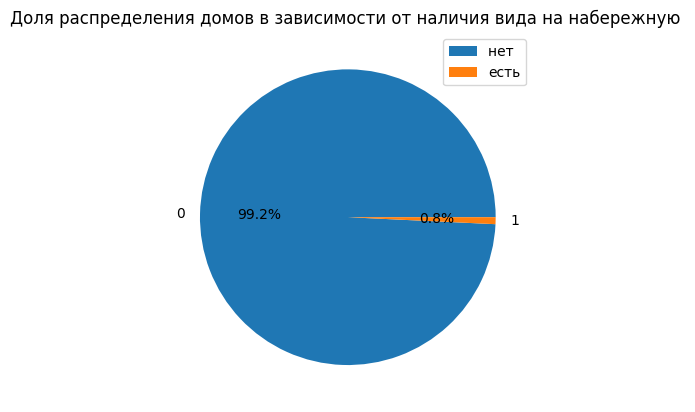

In [7]:
plt.pie(df1_1.values, autopct='%.1f%%', labels=df1_1.index)
plt.title("Доля распределения домов в зависимости от наличия вида на набережную ")
plt.legend(['нет ','есть'])

Домов с видом на набережную очень мало

### 2.2. Изучите распределение этажей домов

In [8]:
df1['floors']=df1['floors'].astype('int64')
df1_2=df1['floors'].value_counts()

df1_2

floors
1    12590
2     8402
3      621
Name: count, dtype: int64

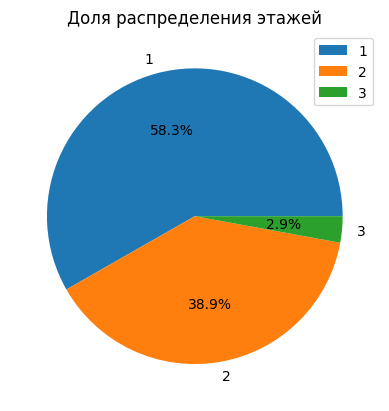

In [9]:
plt.pie(df1_2.values, autopct='%.1f%%', labels=df1_2.index)
plt.title("Доля распределения этажей")
plt.legend(df1_2.index)

Больше всего одноэтажный домой, и очень мало трехэтажных домов

### 2.3. Изучите распределение состояния домов

In [10]:
df1_3=df1['condition'].value_counts()
df1_3

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

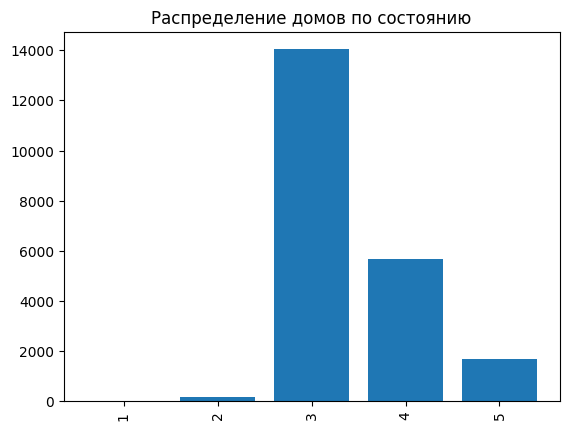

In [11]:
plt.bar(df1_3.index,df1_3.values)
plt.title('Распределение домов по состоянию')
plt.xticks(rotation=90);

Больше всего домов с удовлетворительным состоянием

## 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [12]:
pd.options.display.float_format ='{:.0f}'.format
df1_4=df1.groupby('bedrooms')['price'].agg(price='mean').reset_index().sort_values(by='bedrooms')
df1_4.head(20)

,bedrooms,price
0,0,409504
1,1,317643
2,2,401373
3,3,466232
4,4,635420
5,5,786600
6,6,825521
7,7,951185
8,8,1105077
9,9,894000


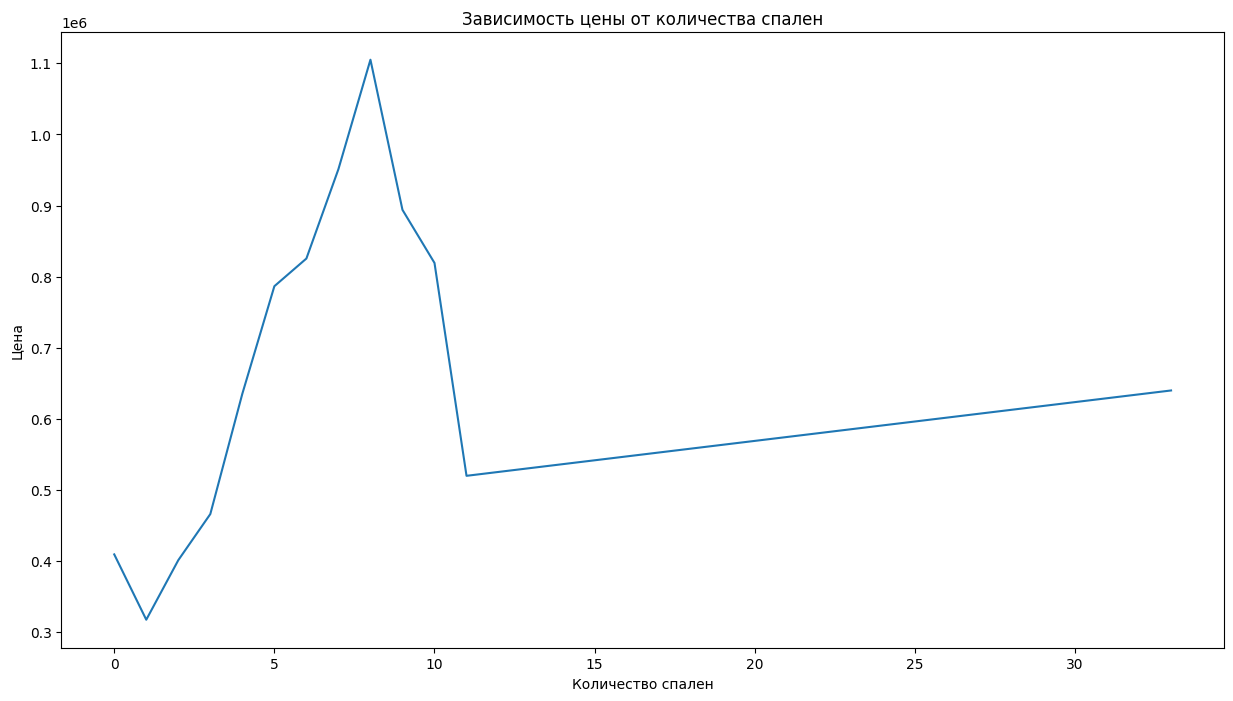

In [13]:
plt.figure(figsize=(15,8))
plt.plot(df1_4['bedrooms'],df1_4['price'])
plt.title('Зависимость цены от количества спален')
plt.xlabel("Количество спален")
plt.ylabel("Цена");


Цена зависит от количества спален, чем больше спален, тем больше цена при количестве спален больше 10,  а в диапазоне до 10 спален цена имеет колоколообразный вид, максиму цены наблюдается при 7 спальнях

In [14]:
pd.options.display.float_format ='{:.0f}'.format
df1_5=df1.groupby('grade')['price'].agg(price='mean').reset_index().sort_values(by='grade')
df1_5.head(20)

,grade,price
0,1,142000
1,3,205667
2,4,214381
3,5,248524
4,6,301920
5,7,402590
6,8,542853
7,9,773513
8,10,1071771
9,11,1496842


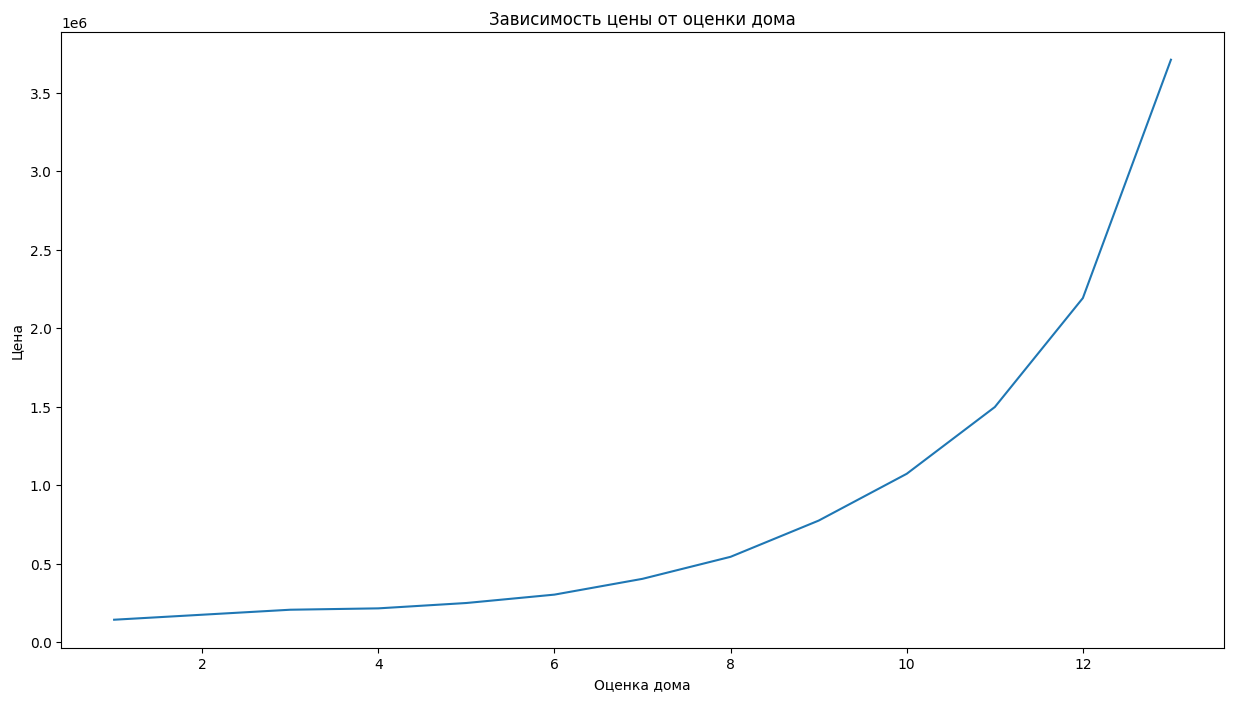

In [15]:
plt.figure(figsize=(15,8))
plt.plot(df1_5['grade'],df1_5['price'])
plt.title('Зависимость цены от оценки дома')
plt.xlabel("Оценка дома")
plt.ylabel("Цена");

Линейная зависимость. Чем выше оценка дома, тем выше цена

In [16]:
pd.options.display.float_format ='{:.0f}'.format
df1_6=df1.groupby('floors')['price'].agg(price='mean').reset_index().sort_values(by='floors')
df1_6.head(20)

,floors,price
0,1,459900
1,2,656776
2,3,587045


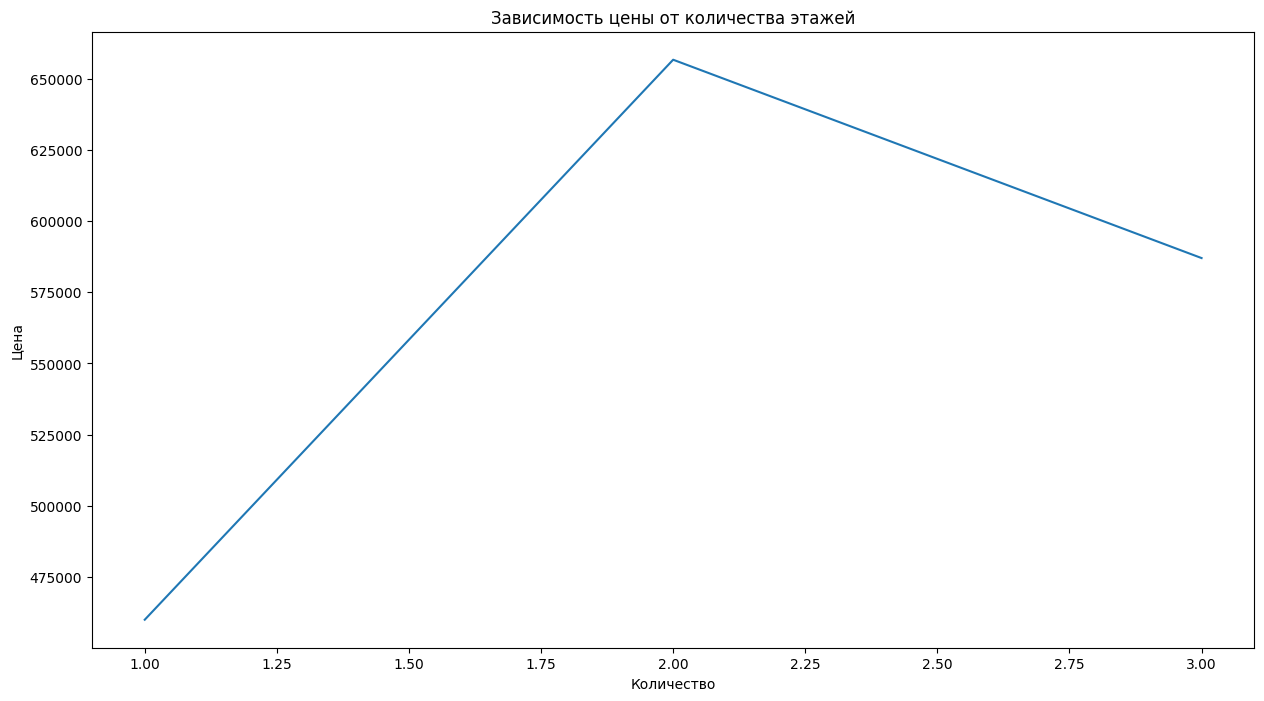

In [17]:
plt.figure(figsize=(15,8))
plt.plot(df1_6['floors'],df1_6['price'])
plt.title('Зависимость цены от количества этажей')
plt.xlabel("Количество")
plt.ylabel("Цена");

Цена растет при увеличении количества домом до 2, затем идет обратная линейная зависимость

([<matplotlib.axis.XTick at 0x28a1d974520>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

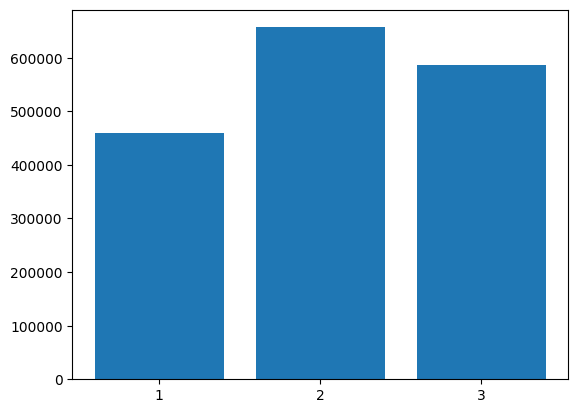

In [18]:
plt.bar(df1_6['floors'],df1_6['price'])
plt.xticks([1,2,3])

Цена выше , если 2 этажа

In [19]:
pd.options.display.float_format ='{:.0f}'.format
df1_7=df1.groupby('waterfront')['price'].agg(price='mean').reset_index().sort_values(by='waterfront')
df1_7.head(20)

,waterfront,price
0,0,531564
1,1,1661876


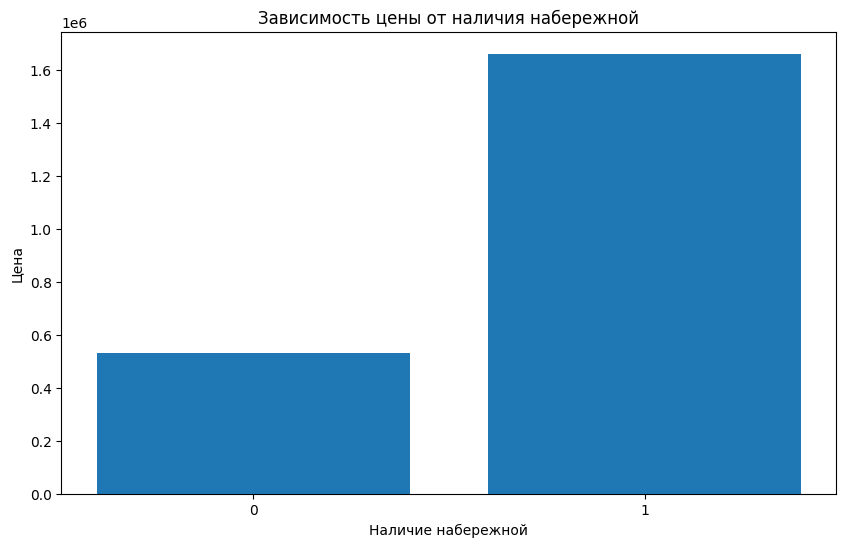

In [20]:
plt.figure(figsize=(10,6))
plt.bar(df1_7['waterfront'], df1_7['price'])
plt.title('Зависимость цены от наличия набережной')
plt.xlabel("Наличие набережной")
plt.xticks([0,1])
plt.ylabel("Цена");

In [21]:
data=df1.groupby('sqft_lot')['price'].mean().reset_index()
data.head(10000)

,sqft_lot,price
0,520,700000
1,572,250000
2,600,367500
3,609,1234570
4,635,256950
...,...,...
9777,982998,998000
9778,1024068,855000
9779,1074218,542500
9780,1164794,190000


In [22]:
import seaborn as sns

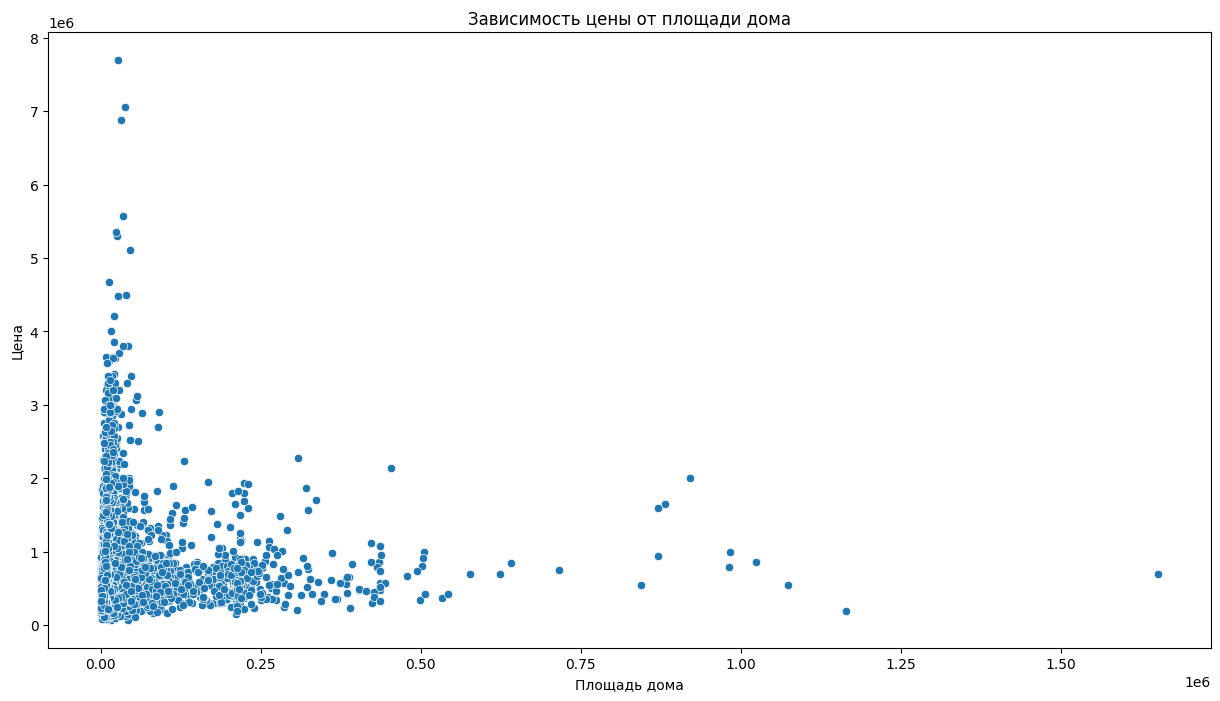

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df1['sqft_lot'], y=df1['price'])
plt.title('Зависимость цены от площади дома')
plt.xlabel("Площадь дома")
plt.ylabel("Цена");

Цены дома растет до значения площади дома 0,05, затем падает

In [39]:
data3=df1.groupby('sqft_lot')['price'].mean().reset_index()
data3.head(10000)

,sqft_lot,price
0,520,700000
1,572,250000
2,600,367500
3,609,1234570
4,635,256950
...,...,...
9777,982998,998000
9778,1024068,855000
9779,1074218,542500
9780,1164794,190000


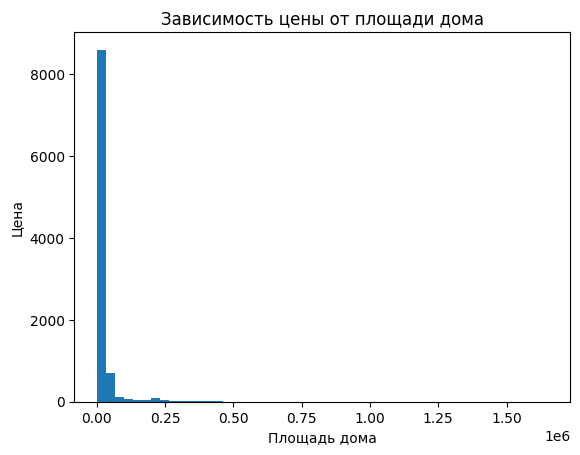

In [40]:
# plt.hist(data3['sqft_lot'],bins=50)
# plt.title('Зависимость цены от площади дома')
# plt.xlabel("Площадь дома")
# plt.ylabel("Цена");



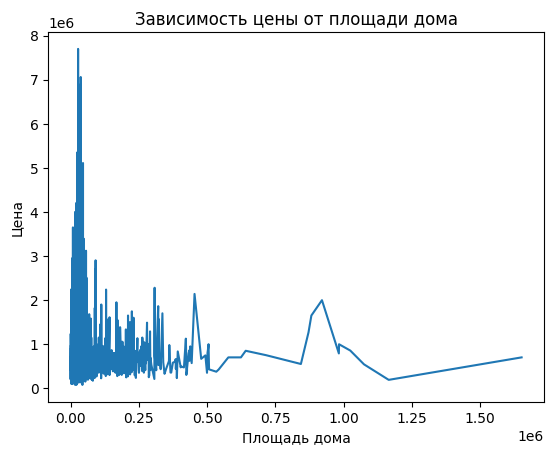

In [46]:
plt.plot(data3['sqft_lot'],data3['price'])
plt.title('Зависимость цены от площади дома')
plt.xlabel("Площадь дома")
plt.ylabel("Цена");


Цена дома выше при маленькой площади дома  0.05

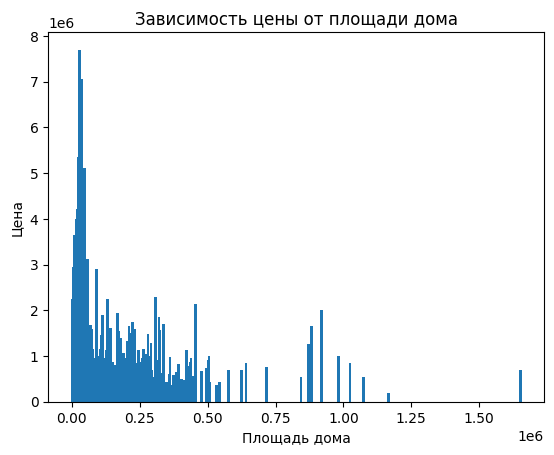

In [50]:
plt.bar(data3['sqft_lot'],data3['price'],width=10000)
plt.title('Зависимость цены от площади дома')
plt.xlabel("Площадь дома")
plt.ylabel("Цена");

Цена дома выше при маленькой площади дома  0.05

<Axes: >

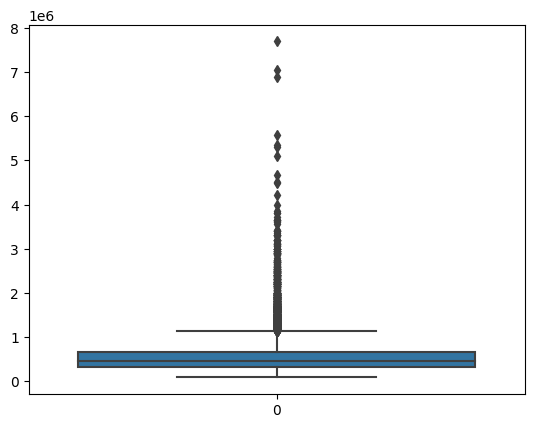

In [54]:
data5=df1['price']
sns.boxplot(data=[data5])

Больше цен в диапазоне от 0.4 до 0.7